In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df= pd.read_csv('Cookie_Cats_cleaned_v01.csv')

In [86]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [88]:
df.shape

(90189, 5)

In [90]:
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [92]:
df.duplicated().value_counts()

False    90189
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [96]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [98]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_stats= df[numeric_columns].describe().transpose()

numeric_stats['skewness']= df[numeric_columns].skew()
numeric_stats['kurtosis']= df[numeric_columns].kurt()


version_percentage =  df['version'].value_counts(normalize=True)*100
retention_1_percentage= df['retention_1'].value_counts(normalize=True)*100
retention_7_percentage= df['retention_7'].value_counts(normalize=True)*100

In [100]:
numeric_columns

Index(['userid', 'sum_gamerounds'], dtype='object')

In [102]:
numeric_stats.head()

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
userid,90189.0,4.998412e+06,2.883286e+06,116.0,2512230.0,4995815.0,7496452.0,9999861.0,-0.001290,-1.196740
sum_gamerounds,90189.0,5.187246e+01,1.950509e+02,0.0,5.0,16.0,51.0,49854.0,185.436313,47130.369631


In [104]:
version_percentage

version
gate_40    50.437415
gate_30    49.562585
Name: proportion, dtype: float64

In [106]:
retention_1_percentage,retention_7_percentage

(retention_1
 False    55.47905
 True     44.52095
 Name: proportion, dtype: float64,
 retention_7
 False    81.393518
 True     18.606482
 Name: proportion, dtype: float64)

In [108]:
retention_day1_table= pd.crosstab(df.version, df['retention_1'],normalize='index',margins=True)
retention_day1_table.columns = ['Did Not Return on Day 1', 'Returned on Day 1']
retention_day1_table= retention_day1_table.reset_index()

retention_day7_table= pd.crosstab(df.version, df['retention_7'],normalize='index',margins=True)
retention_day7_table.columns = ['Did Not Return on Day 7', 'Returned on Day 7']
retention_day7_table= retention_day7_table.reset_index()

print(retention_day1_table)
print(retention_day7_table)



   version  Did Not Return on Day 1  Returned on Day 1
0  gate_30                 0.551812           0.448188
1  gate_40                 0.557717           0.442283
2      All                 0.554790           0.445210
   version  Did Not Return on Day 7  Returned on Day 7
0  gate_30                 0.809799           0.190201
1  gate_40                 0.818000           0.182000
2      All                 0.813935           0.186065


In [110]:
numeric_columns=['sum_gamerounds']
descriptive_stats_by_version= df.groupby('version')[numeric_columns].describe()
skewness_per_version= df.groupby('version')[numeric_columns].apply(lambda col: col.skew()).unstack()
kurtosis_per_version= df.groupby('version')[numeric_columns].apply(lambda col: col.kurtosis()).unstack()

reshaped_stats = descriptive_stats_by_version.unstack().T
reshaped_stats['skewness']= skewness_per_version.unstack().values.flatten()
reshaped_stats['kurtosis']= kurtosis_per_version.unstack().values.flatten()

final_stats= reshaped_stats.reset_index()

In [112]:
print(final_stats)

           level_0 level_1  version                                        0
0   sum_gamerounds   count  gate_30                                  44700.0
1   sum_gamerounds   count  gate_40                                  45489.0
2   sum_gamerounds    mean  gate_30                                52.456264
3   sum_gamerounds    mean  gate_40                                51.298776
4   sum_gamerounds     std  gate_30                               256.716423
5   sum_gamerounds     std  gate_40                               103.294416
6   sum_gamerounds     min  gate_30                                      0.0
7   sum_gamerounds     min  gate_40                                      0.0
8   sum_gamerounds     25%  gate_30                                      5.0
9   sum_gamerounds     25%  gate_40                                      5.0
10  sum_gamerounds     50%  gate_30                                     17.0
11  sum_gamerounds     50%  gate_40                                     16.0

/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_2837/4171824475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=version_percentage.index, y=version_percentage.values, ax=axes[0, 0], palette=custom_palette)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_2837/4171824475.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retention_1_percentage.index, y=retention_1_percentage.values, ax=axes[0, 1], palette=custom_palette)
/var/folders/_g/4tg8f_fn5559zxcgb1vxkn3w0000gn/T/ipykernel_2837/4171824475.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

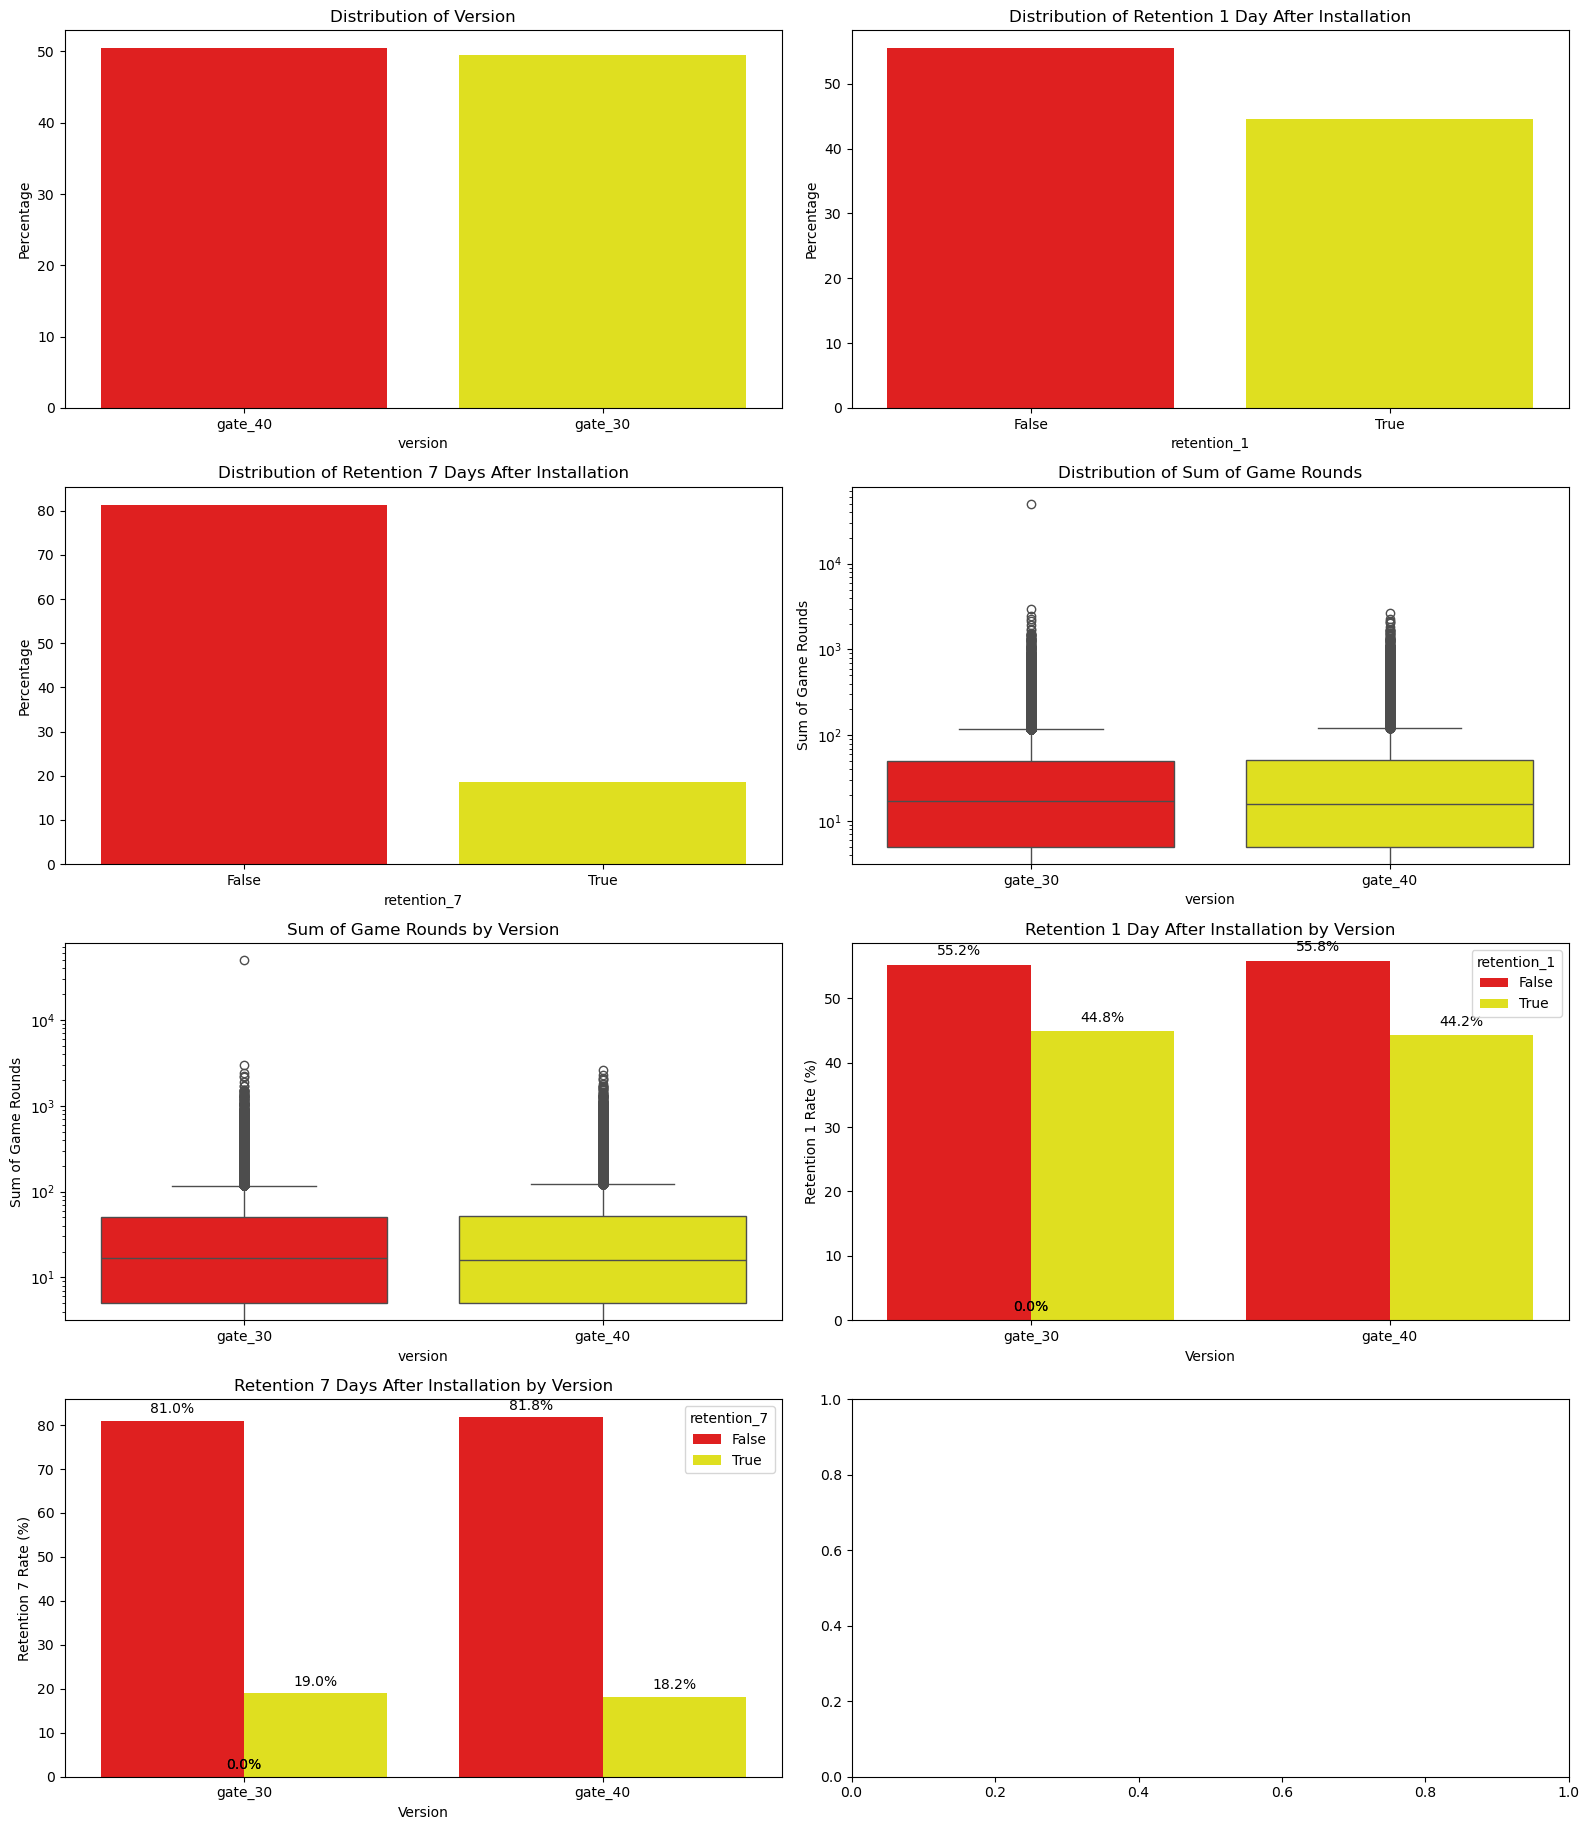

In [114]:

# Performing EDA
custom_palette = ['red', 'yellow']  

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.tight_layout(pad=5.0)

sns.barplot(x=version_percentage.index, y=version_percentage.values, ax=axes[0, 0], palette=custom_palette)
axes[0, 0].set_title('Distribution of Version')
axes[0, 0].set_ylabel('Percentage')

sns.barplot(x=retention_1_percentage.index, y=retention_1_percentage.values, ax=axes[0, 1], palette=custom_palette)
axes[0, 1].set_title('Distribution of Retention 1 Day After Installation')
axes[0, 1].set_ylabel('Percentage')

sns.barplot(x=retention_7_percentage.index, y=retention_7_percentage.values, ax=axes[1, 0], palette=custom_palette)
axes[1, 0].set_title('Distribution of Retention 7 Days After Installation')
axes[1, 0].set_ylabel('Percentage')

sns.boxplot(x='version', y='sum_gamerounds', data=df, ax=axes[1, 1], palette=custom_palette)
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('Distribution of Sum of Game Rounds')
axes[1, 1].set_ylabel('Sum of Game Rounds')

sns.boxplot(x='version', y='sum_gamerounds', data=df, ax=axes[2, 0], palette=custom_palette)
axes[2, 0].set_yscale('log')
axes[2, 0].set_title('Sum of Game Rounds by Version')
axes[2, 0].set_ylabel('Sum of Game Rounds')

retention_1_by_version = df.groupby(['version', 'retention_1']).size().reset_index(name='counts')
retention_1_by_version['percentage'] = retention_1_by_version['counts'] / retention_1_by_version.groupby('version')['counts'].transform('sum') * 100
sns.barplot(ax=axes[2, 1], x='version', y='percentage', hue='retention_1', data=retention_1_by_version, palette=custom_palette)
for p in axes[2, 1].patches:
    height = p.get_height()
    axes[2, 1].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')
axes[2, 1].set_title('Retention 1 Day After Installation by Version')
axes[2, 1].set_xlabel('Version')
axes[2, 1].set_ylabel('Retention 1 Rate (%)')

retention_7_by_version = df.groupby(['version', 'retention_7']).size().reset_index(name='counts')
retention_7_by_version['percentage'] = retention_7_by_version['counts'] / retention_7_by_version.groupby('version')['counts'].transform('sum') * 100
sns.barplot(ax=axes[3, 0], x='version', y='percentage', hue='retention_7', data=retention_7_by_version, palette=custom_palette)
for p in axes[3, 0].patches:
    height = p.get_height()
    axes[3, 0].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')
axes[3, 0].set_title('Retention 7 Days After Installation by Version')
axes[3, 0].set_xlabel('Version')
axes[3, 0].set_ylabel('Retention 7 Rate (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [116]:
control_group= df[df['version']=='gate_30']
test_group= df[df['version']=='gate_40']
control_group.shape, test_group.shape


((44700, 5), (45489, 5))

In [118]:
# Handling Outliers
def handle_outliers(df,feature):
    Q1,Q3= df[feature].quantile([0.25,0.75])
    IQR= Q3-Q1
    lower= Q1-1.5*IQR
    upper= Q3+1.5*IQR
    print(IQR,upper,lower)
    df1= df[(df[feature]>=lower) & (df[feature]<=upper)]
    return df1


control_group= handle_outliers(control_group,'sum_gamerounds')
test_group= handle_outliers(test_group, 'sum_gamerounds')

45.0 117.5 -62.5
47.0 122.5 -65.5


In [120]:
control_group.shape, test_group.shape


((39493, 5), (40471, 5))

In [122]:
df2= pd.concat([control_group,test_group])

In [124]:
df2.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False


In [126]:
df2.sample(10)

,userid,version,sum_gamerounds,retention_1,retention_7
85658,9490107,gate_30,14,False,False
32778,3641760,gate_40,18,False,False
35261,3904359,gate_40,5,False,False
49023,5436286,gate_30,1,False,False
27754,3091645,gate_40,10,False,False
80011,8856973,gate_40,0,False,False
54439,6043654,gate_40,10,True,False
66500,7362864,gate_30,42,True,False
3538,390538,gate_30,2,False,False
70773,7847847,gate_30,73,True,False


In [128]:
# Feature Engineering
numeric_columns=['sum_gamerounds']
descriptive_stats_by_version= df2.groupby('version')[numeric_columns].describe()
skewness_per_version= df2.groupby('version')[numeric_columns].apply(lambda col: col.skew()).unstack()
kurtosis_per_version= df2.groupby('version')[numeric_columns].apply(lambda col: col.kurtosis()).unstack()

reshaped_stats = descriptive_stats_by_version.unstack().T
reshaped_stats['skewness']= skewness_per_version.unstack().values.flatten()
reshaped_stats['kurtosis']= kurtosis_per_version.unstack().values.flatten()

final_stats= reshaped_stats.reset_index()

In [130]:
final_stats

,level_0,level_1,version,0
0,sum_gamerounds,count,gate_30,39493.0
1,sum_gamerounds,count,gate_40,40471.0
2,sum_gamerounds,mean,gate_30,23.596536
3,sum_gamerounds,mean,gate_40,24.245979
4,sum_gamerounds,std,gate_30,26.584511
5,sum_gamerounds,std,gate_40,28.17279
6,sum_gamerounds,min,gate_30,0.0
7,sum_gamerounds,min,gate_40,0.0
8,sum_gamerounds,25%,gate_30,4.0
9,sum_gamerounds,25%,gate_40,4.0


Problem Definition:

For A/B Testing nature of a problem needs to be defined very distinctly in most cases. It is used to analyze the effect of one independent variable on a dependent variable via a control and a treatment group.

Question 1: Has player retention increased by 2% after 1 day?

Objective: Decide if the treatment has 2% boost in player retention after one day.

Null Hypothesis (H0): Retention rate after 1 day has not increased by 2% in the treatment group compared to the control group.

Alternative Hypothesis (H1): Retention rate after 1 day has increased by 2% in the treatment group compared to the control group.

Question 2: Has player retention increased by 5% after 7 days?

Objective: Determine if the treatment increases player retention by 5% after 7 days.

Null Hypothesis (H0): Retention rate after 7 days has not increased by 5% in the treatment group compared to the control group.

Alternative Hypothesis (H1): Retention rate after 7 days has increased by 5% in the treatment group compared to the control group.

Steps:

1. Compute the retention rates observed in each group.
2. Conduct a Z-test for proportions to compare these retention rates.
3. Assess whether the difference is statistically significant.


In [133]:
import scipy.stats as stats

alpha=0.05
beta=0.2
power=1-beta

In [135]:
z_alpha = stats.norm.ppf(1-alpha/2)
z_power= stats.norm.ppf(power)

p1_r1= control_group['retention_1'].mean()
p2_r1= p1_r1+ 0.02

p1_r7= control_group['retention_7'].mean()
p2_r7= p1_r7+0.05

# Determining sample size for Binary A/B Testing

def sample_size(p1,p2, z_alpha, z_beta):
    pooled_prob = (p1 + p2) / 2
    return int(((z_alpha * (2 * pooled_prob * (1 - pooled_prob)) ** 0.5 + z_power * (p1 * (1 - p1) + p2 * (1 - p2)) ** 0.5) / (p1 - p2)) ** 2)


In [137]:
n_r1= sample_size(p1_r1,p2_r1, z_alpha,z_power)
n_r7= sample_size(p1_r7,p2_r7,z_alpha,z_power)

In [139]:
n_r1,n_r7

(9397, 761)

In [141]:
np.random.seed(42)

control_sample_r1 = control_group.sample(n=int(n_r1),random_state=42)
test_sample_r1 = test_group.sample(n=int(n_r1),random_state=42)

control_sample_r7 = control_group.sample(n=int(n_r7),random_state=43)
test_sample_r7 = test_group.sample(n=int(n_r7),random_state=43)

print(f"Sample size of control group for retention 1 day: {len(control_sample_r1)}")
print(f"Sample size of test group for retention 1 day: {len(test_sample_r1)}")

print(f"Sample size of control group for retention 7 day: {len(control_sample_r7)}")
print(f"Sample size of test group for retention 7 day: {len(test_sample_r7)}")


Sample size of control group for retention 1 day: 9397
Sample size of test group for retention 1 day: 9397
Sample size of control group for retention 7 day: 761
Sample size of test group for retention 7 day: 761


In [144]:
from statsmodels.stats.proportion import proportions_ztest

def perform_z_test(control_group, test_group, alpha=0.05, metric='metric_name', uplift=None):
    p_control = control_group[metric].mean()
    p_test = p_control + uplift if uplift is not None else test_group[metric].mean()
    n_control = len(control_group)
    n_test = len(test_group)

    assumptions_met = True
    if n_control * p_control <= 5:
        print("Assumption not met: np > 5 for control group")
        assumptions_met = False
    if n_control * (1 - p_control) <= 5:
        print("Assumption not met: n(1-p) > 5 for control group")
        assumptions_met = False
    if n_test * p_test <= 5:
        print("Assumption not met: np > 5 for treatment group")
        assumptions_met = False
    if n_test * (1 - p_test) <= 5:
        print("Assumption not met: n(1-p) > 5 for treatment group")
        assumptions_met = False

    if assumptions_met:
        print("All assumptions are met for the Z-test.")

        successes = [test_group[metric].sum(), control_group[metric].sum()]
        n_obs = [len(test_group), len(control_group)]

        z_stat, p_val = proportions_ztest(successes, n_obs, value=0, alternative='larger')

        print(f"Z-statistic for {metric}: {z_stat}")
        print(f"P-value for {metric}: {p_val}")

        if p_val < alpha:
            print(f"Reject the null hypothesis: The {metric} has significantly increased.")
        else:
            print(f"Fail to reject the null hypothesis: The {metric} has not significantly increased.")
    else:
        print("Z-test assumptions not met, cannot perform the test.")

perform_z_test(control_sample_r1, test_sample_r1, alpha=0.05, metric='retention_1', uplift=0.02)

perform_z_test(control_sample_r7, test_sample_r7, alpha=0.05, metric='retention_7', uplift=0.05)


All assumptions are met for the Z-test.
Z-statistic for retention_1: -0.6299651909770788
P-value for retention_1: 0.73564132058017
Fail to reject the null hypothesis: The retention_1 has not significantly increased.
All assumptions are met for the Z-test.
Z-statistic for retention_7: -1.933298872613932
P-value for retention_7: 0.9734003046855899
Fail to reject the null hypothesis: The retention_7 has not significantly increased.



Question 3: Has the mean number of game sessions risen by 5 sessions?

Objective: To assess whether the intervention has led to a 5-session increase in the average number of game sessions.

Null Hypothesis (H0): The mean number of game sessions in the treatment group has not gone up by 5 sessions when compared to the control group.

Alternative Hypothesis (H1): The mean number of game sessions in the treatment group has risen by 5 sessions in comparison to the control group.

Steps:

1. Compute the average and standard deviation of the total game rounds for each group.
2. Conduct a two-sample t-test to compare the group averages.
3. Assess if the difference is statistically significant.

In [147]:
# Determining Sample Size for Continous A/B Testing

effect_size=5
alpha=0.05
beta=0.2


z_alpha= stats.norm.ppf(1-alpha/2)
z_beta= stats.norm.ppf(1-beta)

std_dev= pd.concat([control_group['sum_gamerounds'], test_group['sum_gamerounds']]).std()

n= int(((z_alpha+z_beta)*std_dev/effect_size)**2*2)

print(f"Required sample size for average number of sum gamerounds test: {n}")


Required sample size for average number of sum gamerounds test: 471


In [149]:
control_rounds_sample= control_group.sample(n=int(n), random_state=42)

test_rounds_sample= test_group.sample(n=int(n), random_state=42)

In [151]:
alpha=0.05
mean_control = control_rounds_sample['sum_gamerounds'].mean()
mean_test = test_rounds_sample['sum_gamerounds'].mean()
std_control = control_rounds_sample['sum_gamerounds'].std()
std_test = test_rounds_sample['sum_gamerounds'].std()
n_control = len(control_rounds_sample)
    
n_test = len(test_rounds_sample)

pooled_std = ((std_control ** 2 / n_control) + (std_test ** 2 / n_test)) ** 0.5

t_stat = (mean_test - mean_control) / pooled_std

df = n_control + n_test - 2

p_val = stats.t.sf(abs(t_stat), df) * 2 

print(f"T-statistic for sum game rounds: {t_stat}")
print(f"P-value for sum game rounds: {p_val}")

if p_val < alpha:
    print(f"Reject the null hypothesis: The game rounds has significantly changed.")
else:
    print(f"Fail to reject the null hypothesis: The game rounds has not significantly changed.")


T-statistic for sum game rounds: 2.343965899878341
P-value for sum game rounds: 0.019287377427438045
Reject the null hypothesis: The game rounds has significantly changed.
